In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [4]:
tickers = [s.replace('\n', '') for s in tickers]

In [5]:
start = datetime.date.today() - datetime.timedelta(days=1095)
end = datetime.date.today()
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [6]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [7]:
import seaborn as sns
import numpy as np

In [8]:
X = np.array(df.groupby(['Symbol'])['Volume'].mean().reset_index().sort_values(by='Volume', ascending = False)[:5]['Symbol'])
X

array(['TSLA', 'AAPL', 'AMZN', 'F', 'AMD'], dtype=object)

In [9]:
df2 = df.groupby(['Date', 'Symbol'])['Close'].mean().reset_index()

In [10]:
df3 = df2[df2['Symbol'].isin(X)]
df3

,Date,Symbol,Close
3,2020-04-13,AAPL,68.312500
29,2020-04-13,AMD,50.939999
34,2020-04-13,AMZN,108.443497
174,2020-04-13,F,5.160000
444,2020-04-13,TSLA,43.396667
...,...,...,...
376860,2023-04-12,AAPL,160.100006
376886,2023-04-12,AMD,92.330002
376891,2023-04-12,AMZN,97.830002
377032,2023-04-12,F,12.670000


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 3 to 377304
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3780 non-null   datetime64[ns]
 1   Symbol  3780 non-null   object        
 2   Close   3780 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 118.1+ KB


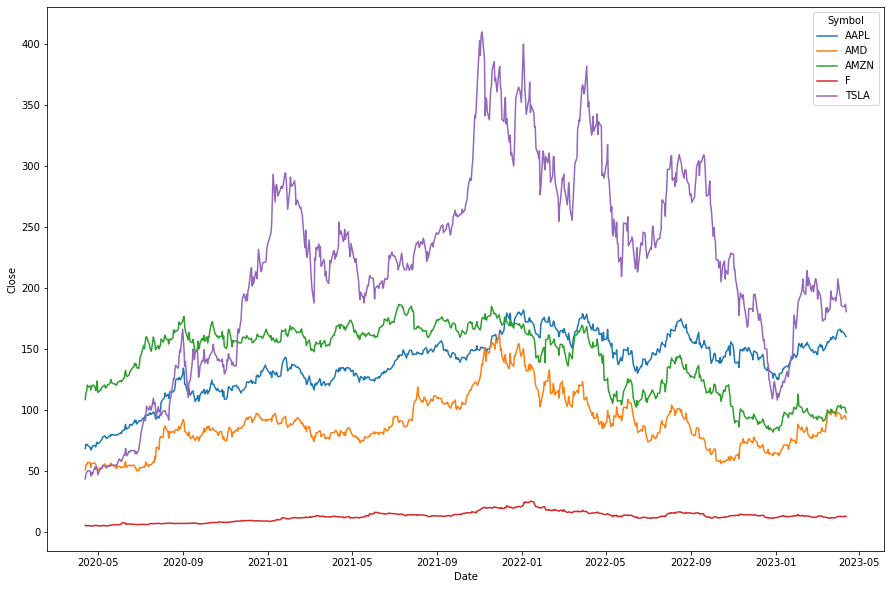

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.lineplot(x = 'Date', y = 'Close', hue = 'Symbol', data = df3)

# for line in plt.gca().lines:
#     label = line.get_label()
#     #print(label)
#     plt.text(line.get_xdata()[0] + 0.5, line.get_ydata()[0], label, ha='left', va='center', fontsize=10)


# show the plot
plt.show()